In [26]:
import numpy as np
import pandas as pd
from scipy.stats import normaltest
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names
inp_red = pd.read_csv("winequality-red.csv", sep=";")
inp_red["is_red"] = np.ones(len(inp_red))
inp_white = pd.read_csv("winequality-white.csv", sep=";")
inp_white["is_red"] = np.zeros(len(inp_white))
inp = pd.concat([inp_red, inp_white])

--2020-11-16 10:19:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2020-11-16 10:19:17 (632 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2020-11-16 10:19:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[======

In [33]:
inp_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0


In [32]:
inp_red.high_quality = (inp_red.quality >= 7)
inp_red.low_quality = (inp_red.quality <= 4)
inp_white.high_quality = (inp_white.quality >= 7)
inp_white.low_quality = (inp_white.quality <= 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-

In [3]:
wines = pd.DataFrame(np.array([inp.is_red, inp.pH, inp.chlorides, inp.quality, np.zeros(len(inp.quality)), np.zeros(len(inp.quality))]).T, columns=['is_red', 'pH', "chlorides", 'quality', 'high_quality', 'low_quality'])
wines.high_quality = (wines.quality >= 7)
wines.low_quality = (wines.quality <= 4)

In [4]:
wines

,is_red,pH,chlorides,quality,high_quality,low_quality
0,1.0,3.51,0.076,5.0,False,False
1,1.0,3.20,0.098,5.0,False,False
2,1.0,3.26,0.092,5.0,False,False
3,1.0,3.16,0.075,6.0,False,False
4,1.0,3.51,0.076,5.0,False,False
...,...,...,...,...,...,...
6492,0.0,3.27,0.039,6.0,False,False
6493,0.0,3.15,0.047,5.0,False,False
6494,0.0,2.99,0.041,6.0,False,False
6495,0.0,3.34,0.022,7.0,True,False


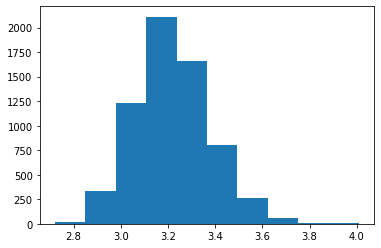

In [6]:
plt.hist(wines.pH)
plt.show()

In [11]:
test_stat, p = normaltest(wines.pH)
print(test_stat, p)

178.2685353132936 1.947508707989605e-39


In [12]:
high_test_stat, high_p = normaltest(wines[wines.high_quality].pH)
print(high_test_stat, high_p)

12.720537439699664 0.0017289020591275438


In [20]:
normaltest(wines[wines.low_quality].pH)

NormaltestResult(statistic=5.508790259033396, pvalue=0.06364750652584973)

(array([ 2., 14., 44., 58., 55., 36., 25.,  9.,  2.,  1.]),
 array([2.74 , 2.856, 2.972, 3.088, 3.204, 3.32 , 3.436, 3.552, 3.668,
        3.784, 3.9  ]),
 <a list of 10 Patch objects>)

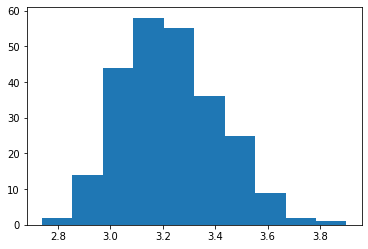

In [21]:
plt.hist(wines[wines.low_quality].pH)

(array([ 34., 110., 222., 303., 261., 229.,  70.,  35.,  10.,   3.]),
 array([2.84 , 2.938, 3.036, 3.134, 3.232, 3.33 , 3.428, 3.526, 3.624,
        3.722, 3.82 ]),
 <a list of 10 Patch objects>)

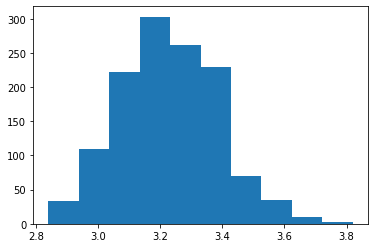

In [13]:
plt.hist(wines[wines.high_quality].pH)

In [14]:
normal_pH = (wines.pH - np.mean(wines.pH)) / np.std(wines.pH)

[]

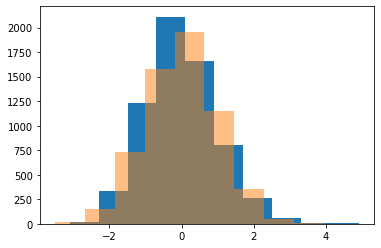

In [53]:
plt.hist(normal_pH)
plt.hist(np.random.normal(0, 1, 6000), alpha=0.5)
plt.plot()

In [18]:
normaltest(normal_pH)

NormaltestResult(statistic=178.26853531328723, pvalue=1.9475087079957912e-39)

In [19]:
normaltest(np.random.normal(0, 1, 1000))

NormaltestResult(statistic=1.8408267248159782, pvalue=0.3983543423365427)

In [25]:
shapiro(wines.pH)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9914382100105286, 2.1467941222210903e-19)

In [27]:
shapiro(wines[wines.high_quality].pH)

(0.9929959774017334, 9.673135537013877e-06)

In [29]:
shapiro(wines[wines.low_quality].pH)

(0.9889515042304993, 0.05673068389296532)

In [31]:
normaltest(inp_red.pH)

NormaltestResult(statistic=33.684697471483915, pvalue=4.8468645347727716e-08)

In [34]:
normaltest(inp_white.pH)

NormaltestResult(statistic=193.24619229351885, pvalue=1.0892373353367272e-42)

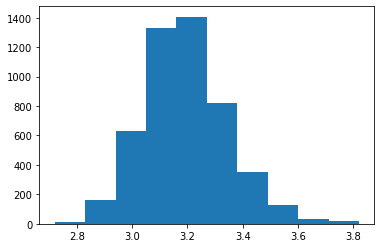

In [36]:
plt.hist(inp_white.pH)
plt.show()

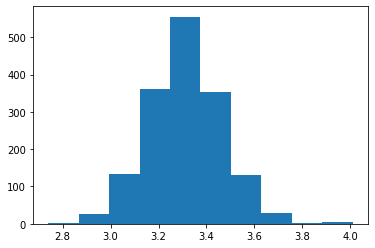

In [37]:
plt.hist(inp_red.pH)
plt.show()

In [38]:
wines.pH.shape

(6497,)

In [40]:
wines[wines.high_quality].pH.shape

(1277,)

In [42]:
wines[wines.low_quality].pH.shape

(246,)

In [46]:
ks_2samp(wines.pH, np.random.normal(0, 1, 1000))

Ks_2sampResult(statistic=0.998, pvalue=0.0)

In [45]:
ks_2samp(wines[wines.high_quality].pH, np.random.normal(0, 1, 1000))

Ks_2sampResult(statistic=0.997, pvalue=3.4416913763379853e-15)

In [44]:
ks_2samp(wines[wines.low_quality].pH, np.random.normal(0, 1, 1000))

Ks_2sampResult(statistic=0.997, pvalue=6.939725968965184e-171)